In [0]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from keras import layers
from keras import models
from keras import optimizers
from keras import utils
from keras import callbacks
from keras import regularizers

## Dati

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
X_train = pickle.load(open("/content/drive/My Drive/AML/Assignment/Assignment_2/x_train.obj", "rb"))

X_test_fin = pickle.load(open("/content/drive/My Drive/AML/Assignment/Assignment_2/x_test.obj", "rb"))

y_train = pickle.load(open("/content/drive/My Drive/AML/Assignment/Assignment_2/y_train.obj", "rb"))


In [0]:
print(X_train.shape)

print(X_test_fin.shape)

(14000, 28, 28)
(8800, 28, 28)


# Classificazione

## Split dati e controllo

In [0]:
X_train, X_test, y_train, y_test =  train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 123)

print(X_train.shape)
print(X_test.shape)

(11200, 28, 28)
(2800, 28, 28)


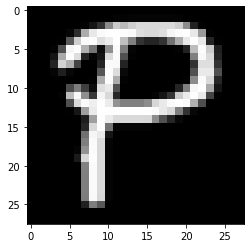

In [0]:
plt.imshow(X_train[0], cmap="gray")

In [0]:
y_train[0] 

16

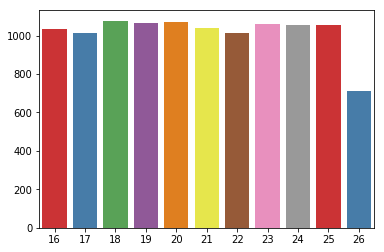

In [0]:
target = pd.DataFrame(y_train)
target.columns = ["TARGET"]

sns.barplot(target["TARGET"].value_counts().index, target["TARGET"].value_counts().values, palette="Set1")

## nella variabile obiettivo non c'è troppa sproporzione

## Reshape

In [0]:
X_train = X_train.reshape(11200, 28*28)
X_test = X_test.reshape(2800, 28*28)
X_test_fin = X_test_fin.reshape(8800, 28*28)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_test_fin = X_test_fin.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255
X_test_fin /= 255

# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train - 16, 11)
y_test = utils.to_categorical(y_test - 16, 11)

## Rete Neurale

In [0]:
dims = X_train.shape[1]


model = models.Sequential()
model.add(layers.Dense(512, input_shape=(dims,), activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation = "softmax"))

In [0]:
es = callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=1,
                              verbose=0, mode='auto')

In [0]:
model.compile(optimizer = optimizers.adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [0]:
history = model.fit(X_train, y_train,
                    batch_size = 64,
                    epochs = 100,
                    validation_split = 0.2,
                    callbacks = [es])

Train on 8960 samples, validate on 2240 samples
Epoch 1/100
8960/8960 [==============================] - 2s 232us/step - loss: 1.2412 - acc: 0.5863 - val_loss: 0.5752 - val_acc: 0.8165
Epoch 2/100
8960/8960 [==============================] - 1s 131us/step - loss: 0.6410 - acc: 0.7984 - val_loss: 0.4111 - val_acc: 0.8750
Epoch 3/100
8960/8960 [==============================] - 1s 131us/step - loss: 0.4892 - acc: 0.8492 - val_loss: 0.3569 - val_acc: 0.8942
Epoch 4/100
8960/8960 [==============================] - 1s 124us/step - loss: 0.4003 - acc: 0.8765 - val_loss: 0.3171 - val_acc: 0.9027
Epoch 5/100
8960/8960 [==============================] - 1s 124us/step - loss: 0.3716 - acc: 0.8810 - val_loss: 0.2923 - val_acc: 0.9156
Epoch 6/100
8960/8960 [==============================] - 1s 127us/step - loss: 0.3378 - acc: 0.8979 - val_loss: 0.2729 - val_acc: 0.9214
Epoch 7/100
8960/8960 [==============================] - 1s 137us/step - loss: 0.3016 - acc: 0.9062 - val_loss: 0.2723 - val_acc: 

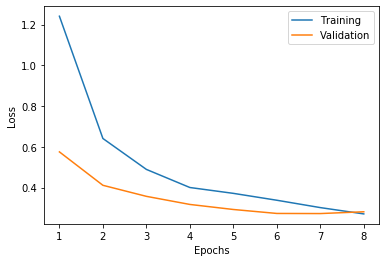

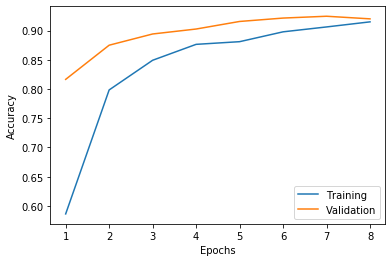

In [0]:
x_plot = list(range(1,history.epoch[-1]+2))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['acc'])
    plt.plot(x_plot, network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'])

    
plot_history(history)

In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size = 64)
print("TEST LOSS:", test_loss)
print("TEST ACCURACY:", test_acc)

2800/2800 [==============================] - 0s 40us/step
TEST LOSS: 0.25758607149124146
TEST ACCURACY: 0.9207142860548837


In [0]:
y_test_pred = model.predict_classes(X_test)
print(classification_report(np.argmax(y_test, 1), y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       259
           1       0.92      0.91      0.92       253
           2       0.90      0.94      0.92       269
           3       0.97      0.98      0.97       266
           4       0.96      0.94      0.95       267
           5       0.92      0.92      0.92       259
           6       0.82      0.91      0.86       254
           7       0.96      0.93      0.94       265
           8       0.95      0.94      0.94       265
           9       0.90      0.86      0.88       264
          10       0.98      0.94      0.96       179

    accuracy                           0.93      2800
   macro avg       0.93      0.93      0.93      2800
weighted avg       0.93      0.93      0.93      2800



In [0]:
y_fin = model.predict_classes(X_test_fin) + 16

In [0]:
a = []
for i in y_fin:
    a.append(i)
with open("Federico_Manenti_790032_score2.txt", "w") as f:
    for i in a:
        f.write("%s\n" % str(i))

# Autoencoder

## Dati e reshape

In [0]:
X_train = pickle.load(open("/content/drive/My Drive/AML/Assignment/Assignment_2/x_train.obj", "rb"))

X_val = pickle.load(open("/content/drive/My Drive/AML/Assignment/Assignment_2/x_test.obj", "rb"))


In [0]:
X_train = X_train.reshape(14000, 28*28)
X_val = X_val.reshape(8800, 28*28)
X_train = X_train.astype("float32")
X_val = X_val.astype("float32")

# Put everything on grayscale
X_train /= 255
X_val /= 255

## Rete neurale

In [0]:
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(392, activation='relu')(input_img)
encoded = layers.Dropout(0.3)(encoded)
encoded_1 = layers.Dense(196, activation='relu')(encoded)
encoded_1 = layers.Dropout(0.3)(encoded_1)

decoded_1 = layers.Dense(392, activation='relu')(encoded_1)
decoded_1 = layers.Dropout(0.3)(decoded_1)
decoded = layers.Dense(784, activation='sigmoid')(decoded_1)
autoencoder = models.Model(input_img, decoded)

In [0]:
encoder = models.Model(input_img, encoded_1)
encoded_input = layers.Input(shape=(196,))
decoder_layer_1 = autoencoder.layers[-3](encoded_input)
decoder_layer_2 = autoencoder.layers[-2](decoder_layer_1)
decoder_layer_3 = autoencoder.layers[-1](decoder_layer_2)
decoder = models.Model(encoded_input, decoder_layer_3)

In [315]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_170"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_131 (InputLayer)       (None, 784)               0         
_________________________________________________________________
dense_338 (Dense)            (None, 392)               307720    
_________________________________________________________________
dropout_147 (Dropout)        (None, 392)               0         
_________________________________________________________________
dense_339 (Dense)            (None, 196)               77028     
_________________________________________________________________
dropout_148 (Dropout)        (None, 196)               0         
_________________________________________________________________
dense_340 (Dense)            (None, 392)               77224     
_________________________________________________________________
dropout_149 (Dropout)        (None, 392)               0 

In [0]:
es = callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='auto')

In [317]:
history = autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(X_val, X_val),
                callbacks = [es])

Train on 14000 samples, validate on 8800 samples
Epoch 1/10
14000/14000 [==============================] - 6s 430us/step - loss: 0.3387 - val_loss: 0.2365
Epoch 2/10
14000/14000 [==============================] - 1s 84us/step - loss: 0.2376 - val_loss: 0.1963
Epoch 3/10
14000/14000 [==============================] - 1s 85us/step - loss: 0.2160 - val_loss: 0.1828
Epoch 4/10
14000/14000 [==============================] - 1s 85us/step - loss: 0.2059 - val_loss: 0.1754
Epoch 5/10
14000/14000 [==============================] - 1s 86us/step - loss: 0.1997 - val_loss: 0.1704
Epoch 6/10
14000/14000 [==============================] - 1s 85us/step - loss: 0.1953 - val_loss: 0.1667
Epoch 7/10
14000/14000 [==============================] - 1s 87us/step - loss: 0.1921 - val_loss: 0.1646
Epoch 8/10
14000/14000 [==============================] - 1s 86us/step - loss: 0.1894 - val_loss: 0.1615
Epoch 9/10
14000/14000 [==============================] - 1s 83us/step - loss: 0.1876 - val_loss: 0.1605
Epoch

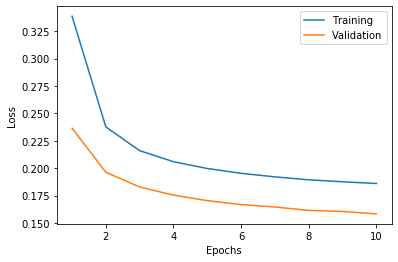

In [318]:
x_plot = list(range(1,history.epoch[-1]+2))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])


    
plot_history(history)

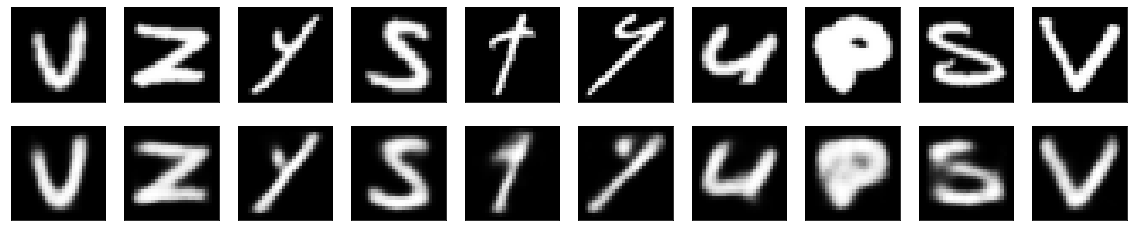

In [319]:
encoded_imgs = encoder.predict(X_val)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_val[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()